<a href="https://colab.research.google.com/github/shriyageetika/TRISO/blob/main/TRISO_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
uploaded = files.upload()

Saving openmc_nek_out_bison0.e to openmc_nek_out_bison0.e


In [4]:
! ls

drive  openmc_nek_out_bison0.e	sample_data


In [6]:
!pip install netcdf4

In [7]:
!pip install netcdf4  # Install the library if you haven't already
import netCDF4 as nc

# Open the Exodus file
exodus_file = 'openmc_nek_out_bison0.e'  # Replace with your file path
ds = nc.Dataset(exodus_file, 'r')  # 'r' for read-only access

# Access data within the file
# Example: get nodal coordinates
x_coords = ds.variables['coordx'][:]
y_coords = ds.variables['coordy'][:]
z_coords = ds.variables['coordz'][:]

# ... access other variables as needed ...

# Close the file when finished
ds.close()

In [8]:
import netCDF4 as nc

# Open the Exodus file
exodus_file = 'openmc_nek_out_bison0.e'
ds = nc.Dataset(exodus_file, 'r')
for var_name, var in ds.variables.items():
       print(f"Variable: {var_name}")
       print(f"  Dimensions: {var.dimensions}")
       print(f"  Shape: {var.shape}")
       print(f"  Data Type: {var.dtype}")
       print(f"  Attributes: {var.ncattrs()}")  # Print attribute names
       print("-" * 20)

Variable: time_whole
  Dimensions: ('time_step',)
  Shape: (14,)
  Data Type: float64
  Attributes: []
--------------------
Variable: eb_status
  Dimensions: ('num_el_blk',)
  Shape: (4,)
  Data Type: int32
  Attributes: []
--------------------
Variable: eb_prop1
  Dimensions: ('num_el_blk',)
  Shape: (4,)
  Data Type: int32
  Attributes: ['name']
--------------------
Variable: ns_status
  Dimensions: ('num_node_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: []
--------------------
Variable: ns_prop1
  Dimensions: ('num_node_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: ['name']
--------------------
Variable: ss_status
  Dimensions: ('num_side_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: []
--------------------
Variable: ss_prop1
  Dimensions: ('num_side_sets',)
  Shape: (8,)
  Data Type: int32
  Attributes: ['name']
--------------------
Variable: coordx
  Dimensions: ('num_nodes',)
  Shape: (59415,)
  Data Type: float64
  Attributes: []
--------------------


In [10]:
from IPython.display import display
import numpy as np
import pandas as pd # import pandas

# Assuming your data is in 'openmc_nek_out_bison0.e' and you want
# to create a DataFrame from 'coordx', 'coordy', 'coordz', and 'vals_nod_var1'

import netCDF4 as nc
ds = nc.Dataset('openmc_nek_out_bison0.e', 'r')

# Extract data from the NetCDF dataset
x_coords = ds.variables['coordx'][:]
y_coords = ds.variables['coordy'][:]
z_coords = ds.variables['coordz'][:]
temperature_data = ds.variables['vals_nod_var1'][:]

# Reshape temperature_data to be 1-dimensional
temperature_data = temperature_data.flatten()  # or temperature_data.reshape(-1)


# Create a Pandas DataFrame
# Repeat coordinates for each temperature data point to match the flattened array
num_timesteps = temperature_data.shape[0] // x_coords.shape[0]  # Assuming time is the first dimension
x_coords_repeated = np.tile(x_coords, num_timesteps)
y_coords_repeated = np.tile(y_coords, num_timesteps)
z_coords_repeated = np.tile(z_coords, num_timesteps)


df = pd.DataFrame({'coordx': x_coords_repeated,
                   'coordy': y_coords_repeated,
                   'coordz': z_coords_repeated,
                   'temperature': temperature_data})

display(df)  # Now 'df' is defined and can be displayed

,coordx,coordy,coordz,temperature
0,-0.008637,-0.015841,0.000,598.0
1,-0.008001,-0.016281,0.000,598.0
2,-0.007365,-0.015841,0.000,598.0
3,-0.007874,-0.015400,0.000,598.0
4,-0.008637,-0.015841,0.032,598.0
...,...,...,...,...
831805,0.010352,0.008035,1.600,0.0
831806,0.012634,0.008191,1.600,0.0
831807,0.013720,0.008799,1.600,0.0
831808,0.011544,0.007615,1.600,0.0


In [11]:
df

,coordx,coordy,coordz,temperature
0,-0.008637,-0.015841,0.000,598.0
1,-0.008001,-0.016281,0.000,598.0
2,-0.007365,-0.015841,0.000,598.0
3,-0.007874,-0.015400,0.000,598.0
4,-0.008637,-0.015841,0.032,598.0
...,...,...,...,...
831805,0.010352,0.008035,1.600,0.0
831806,0.012634,0.008191,1.600,0.0
831807,0.013720,0.008799,1.600,0.0
831808,0.011544,0.007615,1.600,0.0


In [12]:
nodal_coordinates = ds.variables['coordx'][:]  # Replace 'coordx' with the actual variable name
print(nodal_coordinates)

element_connectivity = ds.variables['connect1'][:]  # Replace 'connect1' with the actual variable name
print(element_connectivity)

temperature_data = ds.variables['vals_nod_var1'][:]  # Replace 'vals_nod_var1' with the actual variable name
print(temperature_data)

[-0.00863689 -0.00800096 -0.00736504 ...  0.01371991  0.01154436
  0.01046361]
[[    1     2     3 ...     6     7     8]
 [    4     3     9 ...     7    11    12]
 [    3    13    14 ...    15    16    11]
 ...
 [58231 58233 58237 ... 59398 59402 59400]
 [58233 58234 58238 ... 59399 59403 59402]
 [58234 58182 58190 ... 59347 59355 59403]]
[[598.         598.         598.         ... 598.         598.
  598.        ]
 [620.84915299 620.66811765 620.22594146 ... 708.94853796 707.62640644
  706.07272176]
 [621.19624835 621.01334678 620.56656516 ... 710.07355797 708.72297306
  707.13569864]
 ...
 [621.64075032 621.45524607 621.00155291 ... 709.26881923 707.89694168
  706.28451774]
 [621.64546693 621.45996003 621.00628808 ... 709.02661359 707.65269513
  706.03780767]
 [621.65596015 621.47048358 621.01671944 ...   0.           0.
    0.        ]]


In [16]:
!pip install tabulate  # Install tabulate if you haven't already
from tabulate import tabulate

print(tabulate(df.head(25), headers='keys', tablefmt='psql'))  # 'psql' format is nice

+----+-------------+------------+----------+---------------+
|    |      coordx |     coordy |   coordz |   temperature |
|----+-------------+------------+----------+---------------|
|  0 | -0.00863689 | -0.0158407 |    0     |           598 |
|  1 | -0.00800096 | -0.0162813 |    0     |           598 |
|  2 | -0.00736504 | -0.0158407 |    0     |           598 |
|  3 | -0.00787378 | -0.0154001 |    0     |           598 |
|  4 | -0.00863689 | -0.0158407 |    0.032 |           598 |
|  5 | -0.00800096 | -0.0162813 |    0.032 |           598 |
|  6 | -0.00736504 | -0.0158407 |    0.032 |           598 |
|  7 | -0.00787378 | -0.0154001 |    0.032 |           598 |
|  8 | -0.00672911 | -0.0154001 |    0     |           598 |
|  9 | -0.00711067 | -0.0149595 |    0     |           598 |
| 10 | -0.00672911 | -0.0154001 |    0.032 |           598 |
| 11 | -0.00711067 | -0.0149595 |    0.032 |           598 |
| 12 | -0.0068563  | -0.0162813 |    0     |           598 |
| 13 | -0.00634755 | -0.

In [20]:
last_10_rows = df.tail(10)
print(tabulate(last_10_rows, headers='keys', tablefmt='psql'))

+--------+-----------+------------+----------+---------------+
|        |    coordx |     coordy |   coordz |   temperature |
|--------+-----------+------------+----------+---------------|
| 831800 | 0.0111331 | 0.0092771  |      1.6 |             0 |
| 831801 | 0.0102408 | 0.00899936 |      1.6 |             0 |
| 831802 | 0.0123426 | 0.00891925 |      1.6 |             0 |
| 831803 | 0.0133398 | 0.00945732 |      1.6 |             0 |
| 831804 | 0.0113387 | 0.00844602 |      1.6 |             0 |
| 831805 | 0.0103522 | 0.00803474 |      1.6 |             0 |
| 831806 | 0.0126338 | 0.00819075 |      1.6 |             0 |
| 831807 | 0.0137199 | 0.00879898 |      1.6 |             0 |
| 831808 | 0.0115444 | 0.00761494 |      1.6 |             0 |
| 831809 | 0.0104636 | 0.00707011 |      1.6 |             0 |
+--------+-----------+------------+----------+---------------+


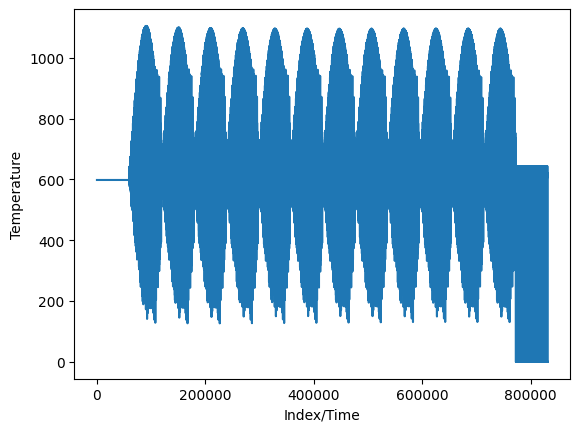

In [21]:
plt.plot(df.index, df['temperature'])  # Assuming index represents time or some order
plt.xlabel('Index/Time')
plt.ylabel('Temperature')
plt.show()

(600.0, 900.0)

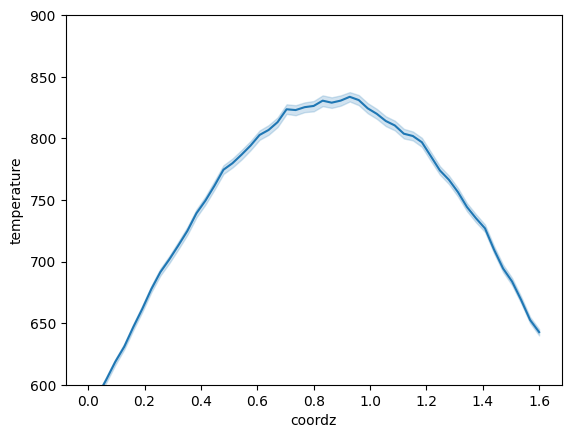

In [24]:
#sns.lineplot
ax1 = sns.lineplot(df, y='temperature', x='coordz')
ax1.set_ylim(600,900)

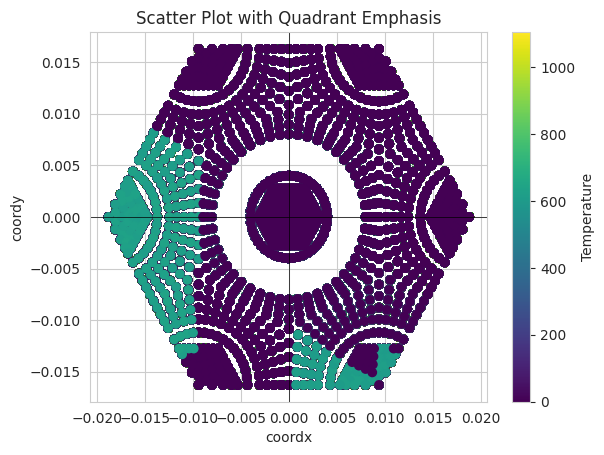

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['coordx'], df['coordy'], c=df['temperature'], cmap='viridis')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
plt.xlabel('coordx')
plt.ylabel('coordy')
plt.title('Scatter Plot with Quadrant Emphasis')
plt.colorbar(label='Temperature')
plt.show()

<ipython-input-42-b62fc9deeb5d>:9: RuntimeWarning: divide by zero encountered in divide
  y = a / x + b  # Calculate temperature using the equation


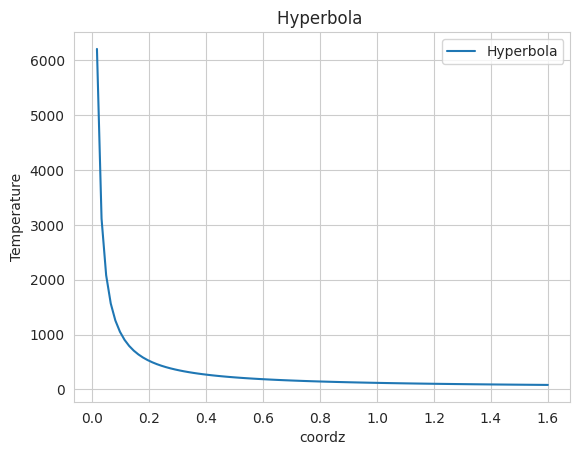

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming a hyperbolic relationship: temperature = a / coordx + b
a = 100  # Adjust these parameters based on your data
b = 20

x = np.linspace(df['coordz'].min(), df['coordz'].max(), 100)  # Range of coordx values
y = a / x + b  # Calculate temperature using the equation

plt.plot(x, y, label='Hyperbola')  # Plot the hyperbola
plt.xlabel('coordz')
plt.ylabel('Temperature')
plt.title('Hyperbola')
plt.legend()
plt.show()

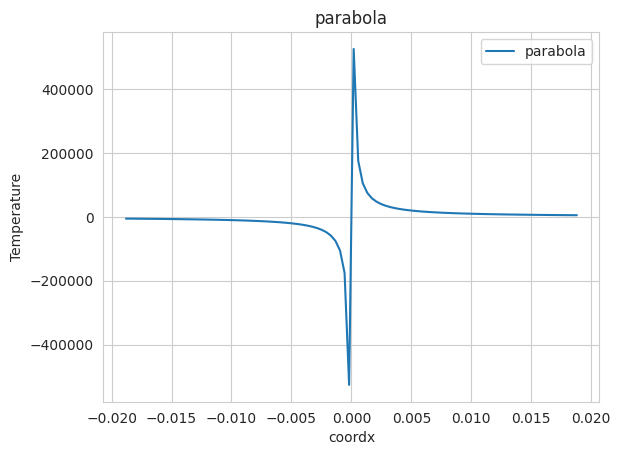

In [43]:
a = 100  # Adjust these parameters based on your data
b = 20

x = np.linspace(df['coordx'].min(), df['coordx'].max(), 100)  # Range of coordx values
y = a / x + b  # Calculate temperature using the equation

plt.plot(x, y, label='parabola')
plt.xlabel('coordx')
plt.ylabel('Temperature')
plt.title('parabola')
plt.legend()
plt.show()

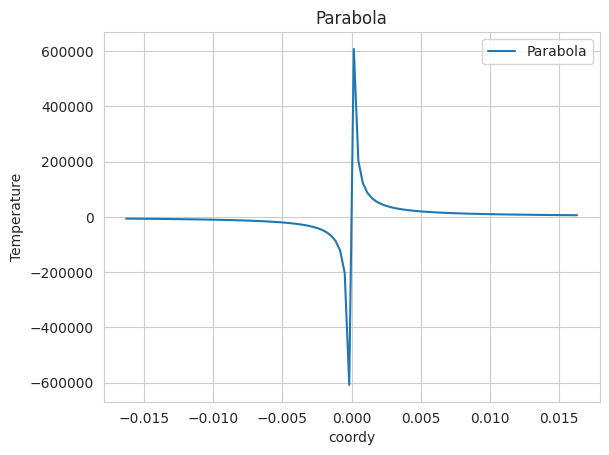

In [44]:
a = 100  # Adjust these parameters based on your data
b = 20

x = np.linspace(df['coordy'].min(), df['coordy'].max(), 100)  # Range of coordx values
y = a / x + b  # Calculate temperature using the equation

plt.plot(x, y, label='Parabola')  # Plot the hyperbola
plt.xlabel('coordy')
plt.ylabel('Temperature')
plt.title('Parabola')
plt.legend()
plt.show()